## run this cell before starting spark cluster connection (corrects module error)

In [1]:
import os
print os.environ['PYSPARK_PYTHON']
os.environ['PYSPARK_PYTHON']=os.environ['LCG_VIEW'] + '/bin/python'
print os.environ['PYSPARK_PYTHON']

/etc/spark/python
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/bin/python


### Import necessary spark and python stuff

In [2]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import from_json
from pyspark.ml.feature import VectorAssembler

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### select the data

In [4]:
df = spark.read.json("/user/rucio01/traces/traces.2018-04*")

### Create temporary table view

In [5]:
df.createOrReplaceTempView("traces")

### Use PySpark to query download events and split dataset DID into new features

In [6]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

### Official Data Only

In [7]:
df_ps = spark.sql("SELECT *\
                   FROM traces \
                   WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')")

In [8]:
df_ps.describe().toPandas()

summary  account appid catStart         clientState  \
0  count   790748   0     0        790748               
1  mean    None     None  None     None                 
2  stddev  None     None  None     None                 
3  min     aagaard  None  None     CannotAuthenticate   
4  max     zzheng   None  None     SourceNotFound       

                                                                                               dataset  \
0  790748                                                                                                
1  None                                                                                                  
2  None                                                                                                  
3  data10_hi.00169927.physics_bulk.ROOT.NTUP_HI.r2111_p456                                               
4  mc16_valid.423105.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP280_500.merge.AOD.e5094_s3238_r10441_r10210   

  datasetName datasetScope dataset_scope  duid eventType        eventVersion  \
0  0           790748       0             0     790748    790748               
1  None        None         None          None  None      None                 
2  None        None         None          None  None      None                 
3  None        data10_hi    None          None  download  1.13.2               
4  None        mc16_valid   None          None  download  webui_1.15.3.post1   

                             filename              filesize  guid  \
0  781932                              790748                0      
1  None                                6.074313714038163E8   None   
2  None                                1.2342018230257432E9  None   
3  AOD.05371635._000001.pool.root.1    10000                 None   
4  log.13787275._000072.job.log.tgz.1  999995790             None   

                   hostname    ip localSite  \
0  790746                    0     0          
1  None                      None  None       
2  None                      None  None       
3  ReCaS-ui-01.cs.infn.it    None  None       
4  xenia.nevis.columbia.edu  None  None       

                                       name    pq protocol relativeStart  \
0  8816                                      0     790748   0              
1  None                                      None  None     None           
2  None                                      None  None     None           
3  AOD.11189316._000046.pool.root.1          None  davs     None           
4  NTUP_PILEUP.13122740._000002.pool.root.1  None  srm      None           

              remoteSite       scope stateReason suspicious taskid timeEnd  \
0  790748                 790748      0           0          0      0        
1  None                   None        None        None       None   None     
2  None                   None        None        None       None   None     
3  AGLT2_CALIBDISK        data10_hi   None        None       None   None     
4  ZA-WITS-CORE_PRODDISK  mc16_valid  None        None       None   None     

  timeStart                           traceId  \
0  0         790748                             
1  None      None                               
2  None      None                               
3  None      00001963ee5a49178eccc3cd255fcb72   
4  None      fffff6db150d4a178afa9a39131df4fd   

                                     traceIp              traceTimeentry  \
0  790748                                     790748                       
1  None                                       None                         
2  None                                       None                         
3  118.209.77.222, 2001:1458:201:e3::100:155  2018-03-31T22:04:00.149492   
4  ::ffff:95.103.58.33                        2018-04-30T21:59:46.283086   

    traceTimeentryUnix           transferEnd        transferStart   url   usr  \
0  790748               595268                790746               0     0      
1  

## add new column "hour"

In [9]:
#problem mit join lösen: einfach aus filename und hour/day eine neue spalte erstellen um drauf zu joinen
df_ps = df_ps.withColumn("hour", from_unixtime(df_ps['traceTimeentryUnix'], 'yyyy-MM-dd HH'))

In [10]:
df_ps.limit(10).toPandas()

account appid catStart         clientState  \
0  yliu      None  None     ServiceUnavailable   
1  yliu      None  None     DONE                 
2  yliu      None  None     ServiceUnavailable   
3  changqia  None  None     DONE                 
4  changqia  None  None     ServiceUnavailable   
5  yliu      None  None     ServiceUnavailable   
6  yliu      None  None     DONE                 
7  heng      None  None     DONE                 
8  yliu      None  None     DONE                 
9  yliu      None  None     DONE                 

                                                                                                                           dataset  \
0  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
1  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
2  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
3  data16_13TeV.00300655.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3372                                                           
4  data16_13TeV.00300655.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3372                                                           
5  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
6  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
7  mc16_13TeV.345056.PowhegPythia8EvtGen_NNPDF3_AZNLO_ZH125J_MINLO_vvbb_VpT.deriv.DAOD_HIGG5D1.e5706_e5984_s3126_r9364_r9315_p3260   
8  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
9  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           

  datasetName  datasetScope dataset_scope  duid eventType eventVersion  \
0  None        data15_13TeV  None          None  download  1.14.11       
1  None        data15_13TeV  None          None  download  1.14.11       
2  None        data15_13TeV  None          None  download  1.14.11       
3  None        data16_13TeV  None          None  download  1.14.11       
4  None        data16_13TeV  None          None  download  1.14.11       
5  None        data15_13TeV  None          None  download  1.14.11       
6  None        data15_13TeV  None          None  download  1.14.11       
7  None        mc16_13TeV    None          None  download  1.14.11       
8  None        data15_13TeV  None          None  download  1.14.11       
9  None        data15_13TeV  None          None  download  1.14.11       

                                    filename    filesize  guid  \
0  DAOD_HIGG5D1.11568050._000282.pool.root.1  416900305   None   
1  DAOD_HIGG5D1.11568050._000284.pool.root.1  358630843   None   
2  DAOD_HIGG5D1.11568050._000283.pool.root.1  417994016   None   
3  DAOD_HIGG5D1.12610361._000044.pool.root.1  3998468117  None   
4  DAOD_HIGG5D1.12610361._000048.pool.root.1  3575614070  None   
5  DAOD_HIGG5D1.11568050._000285.pool.root.1  407308785   None   
6  DAOD_HIGG5D1.11568050._000282.pool.root.1  416900305   None   
7  DAOD_HIGG5D1.12139571._000005.pool.root.1  4478932504  None   
8  DAOD_HIGG5D1.11568050._000283.pool.root.1  417994016   None   
9  DAOD_HIGG5D1.11568050._000286.pool.root.1  382396263   None   

               hostname    ip localSite  name    pq protocol relativeStart  \
0  ui05.hep.ustc.edu.cn  None  None      None  None  davs     None           
1  ui05.hep.ustc.edu.cn  None  None      None  None  srm      None           
2  ui05.hep.ustc.edu.cn  None  None      None  None  davs     None           
3  ui05.hep.ustc.edu.cn  None  None      None  None  root     None           
4  ui05.hep.ustc.edu.cn  None  None      None 

### drop columns that do not contain any values (or very little values, like 'name') based on previous describe()

In [11]:
df_ps = df_ps.drop('appid', 'catStart', 'datasetName', 'dataset_scope', 'duid', 
                   'guid', 'ip', 'localSite', 'pq', 'relativeStart', 'stateReason', 
                   'suspicious', 'taskid', 'timeEnd', 'timeStart', 'url', 'usr', 
                   'usrdn', 'validateStart', 'version', 'name')

## Drop empty Mai columns

In [12]:
df_ps = df_ps.drop('_corrupt_record', 'rse')

In [13]:
df_ps.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        0             0          0              

   filename  filesize  hostname  protocol  remoteSite  scope  traceId  \
0  8816      0         2         0         0           0      0         

   traceIp  traceTimeentry  traceTimeentryUnix  transferEnd  transferStart  \
0  0        0               0                   195480       2               

   uuid  hour  
0  0     0

## Split dataset column

In [14]:
split_col = split(df_ps['dataset'], "\.")
df_ps = df_ps.withColumn('project', split_col.getItem(0))
df_ps = df_ps.withColumn('run_number', split_col.getItem(1))
df_ps = df_ps.withColumn('stream_name', split_col.getItem(2))
df_ps = df_ps.withColumn('prod_step', split_col.getItem(3))
df_ps = df_ps.withColumn('datatype', split_col.getItem(4))
df_ps = df_ps.withColumn('dataset_version', split_col.getItem(5))

In [15]:
df_ps.describe().toPandas()

summary  account         clientState  \
0  count   790748   790748               
1  mean    None     None                 
2  stddev  None     None                 
3  min     aagaard  CannotAuthenticate   
4  max     zzheng   SourceNotFound       

                                                                                               dataset  \
0  790748                                                                                                
1  None                                                                                                  
2  None                                                                                                  
3  data10_hi.00169927.physics_bulk.ROOT.NTUP_HI.r2111_p456                                               
4  mc16_valid.423105.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP280_500.merge.AOD.e5094_s3238_r10441_r10210   

  datasetScope eventType        eventVersion  \
0  790748       790748    790748               
1  None         None      None                 
2  None         None      None                 
3  data10_hi    download  1.13.2               
4  mc16_valid   download  webui_1.15.3.post1   

                             filename              filesize  \
0  781932                              790748                 
1  None                                6.074313714038163E8    
2  None                                1.2342018230257437E9   
3  AOD.05371635._000001.pool.root.1    10000                  
4  log.13787275._000072.job.log.tgz.1  999995790              

                   hostname protocol             remoteSite       scope  \
0  790746                    790748   790748                 790748       
1  None                      None     None                   None         
2  None                      None     None                   None         
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK        data10_hi    
4  xenia.nevis.columbia.edu  srm      ZA-WITS-CORE_PRODDISK  mc16_valid   

                            traceId  \
0  790748                             
1  None                               
2  None                               
3  00001963ee5a49178eccc3cd255fcb72   
4  fffff6db150d4a178afa9a39131df4fd   

                                     traceIp              traceTimeentry  \
0  790748                                     790748                       
1  None                                       None                         
2  None                                       None                         
3  118.209.77.222, 2001:1458:201:e3::100:155  2018-03-31T22:04:00.149492   
4  ::ffff:95.103.58.33                        2018-04-30T21:59:46.283086   

    traceTimeentryUnix          transferEnd         transferStart  \
0  790748               595268               790746                 
1  1.523708468183359E9  1.523663766553447E9  1.5237084061555357E9   
2  664173.7156901907    676531.6601786062    664163.2723222836      
3  1.522533840149492E9  1.522533839115711E9  1.522527378084161E9    
4  1.525125586283086E9  1.525125586189065E9  1.525125342411194E9    

                               uuid           hour     project  \
0  790748                            790748         790748       
1  None                              None           None         
2  None                              None           None         
3  0003eeaf1bfb4181af7c6e5939938d37  2018-04-01 00  data10_hi    
4  ffff4fc350e24a83b6c082837d70776e  2018-04-30 23  mc16_valid   

          run_number                                   stream_name prod_step  \
0  790748             790748                                        790748     
1  349629.9451744885  None                                          None       
2  56960.72072068577  None                                          None       
3  00169927           AcerMCPythia_P2011CCTEQ6L1_singletop_tchan_l  PhysCont   
4  periodM            physics_bulk                                  simul      

  dataty

In [16]:
df_ps.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        0             0          0              

   filename  filesize  hostname  protocol  remoteSite  scope  traceId  \
0  8816      0         2         0         0           0      0         

   traceIp  traceTimeentry  traceTimeentryUnix  transferEnd  transferStart  \
0  0        0               0                   195480       2               

   uuid  hour  project  run_number  stream_name  prod_step  datatype  \
0  0     0     0        0           0            0          0          

   dataset_version  
0  4644

## Drop transferend due to many missing values

In [17]:
df_ps = df_ps.drop('transferEnd')

In [18]:
df_ps = df_ps.dropna()

## create new concatenated column to get a suitable join key
### vorher konnte man einfach auf den filenamen alleine joinen weil man für den monat ja die komplette anzahl für dieses file wollte und nicht pro stunde

In [19]:
df_ps.select(concat(df_ps["filename"], df_ps["hour"])).limit(10).toPandas()

concat(filename, hour)
0  DAOD_HIGG5D1.11568050._000282.pool.root.12018-04-01 00
1  DAOD_HIGG5D1.11568050._000284.pool.root.12018-04-01 00
2  DAOD_HIGG5D1.11568050._000283.pool.root.12018-04-01 00
3  DAOD_HIGG5D1.12610361._000044.pool.root.12018-04-01 00
4  DAOD_HIGG5D1.12610361._000048.pool.root.12018-04-01 00
5  DAOD_HIGG5D1.11568050._000285.pool.root.12018-04-01 00
6  DAOD_HIGG5D1.11568050._000282.pool.root.12018-04-01 00
7  DAOD_HIGG5D1.12139571._000005.pool.root.12018-04-01 00
8  DAOD_HIGG5D1.11568050._000283.pool.root.12018-04-01 00
9  DAOD_HIGG5D1.11568050._000286.pool.root.12018-04-01 00

In [20]:
df_ps = df_ps.withColumn("join_key_1", concat(df_ps["filename"], df_ps["hour"]))

In [21]:
df_ps.limit(10).toPandas()

account         clientState  \
0  yliu      ServiceUnavailable   
1  yliu      DONE                 
2  yliu      ServiceUnavailable   
3  changqia  DONE                 
4  changqia  ServiceUnavailable   
5  yliu      ServiceUnavailable   
6  yliu      DONE                 
7  heng      DONE                 
8  yliu      DONE                 
9  yliu      DONE                 

                                                                                                                           dataset  \
0  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
1  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
2  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
3  data16_13TeV.00300655.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3372                                                           
4  data16_13TeV.00300655.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3372                                                           
5  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
6  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
7  mc16_13TeV.345056.PowhegPythia8EvtGen_NNPDF3_AZNLO_ZH125J_MINLO_vvbb_VpT.deriv.DAOD_HIGG5D1.e5706_e5984_s3126_r9364_r9315_p3260   
8  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           
9  data15_13TeV.00280231.physics_Main.deriv.DAOD_HIGG5D1.r9264_p3083_p3213                                                           

   datasetScope eventType eventVersion  \
0  data15_13TeV  download  1.14.11       
1  data15_13TeV  download  1.14.11       
2  data15_13TeV  download  1.14.11       
3  data16_13TeV  download  1.14.11       
4  data16_13TeV  download  1.14.11       
5  data15_13TeV  download  1.14.11       
6  data15_13TeV  download  1.14.11       
7  mc16_13TeV    download  1.14.11       
8  data15_13TeV  download  1.14.11       
9  data15_13TeV  download  1.14.11       

                                    filename    filesize  \
0  DAOD_HIGG5D1.11568050._000282.pool.root.1  416900305    
1  DAOD_HIGG5D1.11568050._000284.pool.root.1  358630843    
2  DAOD_HIGG5D1.11568050._000283.pool.root.1  417994016    
3  DAOD_HIGG5D1.12610361._000044.pool.root.1  3998468117   
4  DAOD_HIGG5D1.12610361._000048.pool.root.1  3575614070   
5  DAOD_HIGG5D1.11568050._000285.pool.root.1  407308785    
6  DAOD_HIGG5D1.11568050._000282.pool.root.1  416900305    
7  DAOD_HIGG5D1.12139571._000005.pool.root.1  4478932504   
8  DAOD_HIGG5D1.11568050._000283.pool.root.1  417994016    
9  DAOD_HIGG5D1.11568050._000286.pool.root.1  382396263    

               hostname protocol                  remoteSite         scope  \
0  ui05.hep.ustc.edu.cn  davs     TAIWAN-LCG2_DATADISK        data15_13TeV   
1  ui05.hep.ustc.edu.cn  srm      NET2_DATADISK               data15_13TeV   
2  ui05.hep.ustc.edu.cn  davs     TAIWAN-LCG2_DATADISK        data15_13TeV   
3  ui05.hep.ustc.edu.cn  root     IN2P3-CC_DATADISK           data16_13TeV   
4  ui05.hep.ustc.edu.cn  srm      IN2P3-CC_DATADISK           data16_13TeV   
5  ui05.hep.ustc.edu.cn  davs     TAIWAN-LCG2_DATADISK        data15_13TeV   
6  ui05.hep.ustc.edu.cn  srm      TAIWAN-LCG2_DATADISK        data15_13TeV   
7  ui05.hep.ustc.edu.cn  root     UKI-SCOTGRID-ECDF_DATADISK  mc16_13TeV     
8  ui05.hep.ustc.edu.cn  srm      TAIWAN-LCG2_DATADISK        data15_13TeV   
9  ui05.hep.ustc.edu.cn  srm      NET2_DATADISK               data15_13TeV   

                            traceId                traceIp  \
0  eb4d01a550ed4e60863409a4fd11898e  ::ffff:202.38.140.118   
1  0294d3cc0cc2419b9a494f19eeeb6ea4 

In [22]:
df_ps.createOrReplaceTempView("df_ps")

### Count dataset hits and join both tables

In [23]:
df_ps_counts = spark.sql("SELECT filename AS file_counts, from_unixtime(traceTimeentryUnix, 'y-MM-dd HH') AS hour, count(*) as hits \
                               FROM traces \
                               WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')\
                               GROUP BY  filename, hour \
                               ORDER BY 2 DESC")

In [24]:
df_ps_counts.limit(10).toPandas()

file_counts           hour  hits
0  DAOD_ZMUMU.13700577._000065.pool.root.1    2018-04-30 23  4   
1  DAOD_HIGG3D1.11611720._000193.pool.root.1  2018-04-30 23  2   
2  DAOD_EXOT8.13457272._000055.pool.root.1    2018-04-30 23  1   
3  DAOD_HIGG3D1.11611720._000178.pool.root.1  2018-04-30 23  2   
4  DAOD_SUSY5.13555633._000073.pool.root.1    2018-04-30 23  1   
5  DAOD_EXOT8.13457653._000240.pool.root.1    2018-04-30 23  1   
6  DAOD_EXOT8.13457516._000125.pool.root.1    2018-04-30 23  1   
7  DAOD_EXOT8.13457096._000110.pool.root.1    2018-04-30 23  1   
8  DAOD_EXOT8.13457653._000262.pool.root.1    2018-04-30 23  1   
9  DAOD_SUSY5.13555633._000122.pool.root.1    2018-04-30 23  1

In [25]:
df_ps_counts = df_ps_counts.withColumn("join_key_2", concat(df_ps_counts["file_counts"], df_ps_counts["hour"]))

In [26]:
df_ps_counts = df_ps_counts.drop("hour", "file_counts")

In [27]:
df_ps_counts.limit(10).toPandas()

hits                                              join_key_2
0  1     DAOD_SUSY5.13555633._000120.pool.root.12018-04-30 23  
1  1     DAOD_SUSY5.13555633._000112.pool.root.12018-04-30 23  
2  1     DAOD_SUSY5.13555633._000079.pool.root.12018-04-30 23  
3  1     DAOD_EXOT8.13457096._000116.pool.root.12018-04-30 23  
4  1     DAOD_EXOT8.13457779._000052.pool.root.12018-04-30 23  
5  2     DAOD_HIGG3D1.11611720._000192.pool.root.12018-04-30 23
6  1     DAOD_SUSY5.13555633._000078.pool.root.12018-04-30 23  
7  1     DAOD_SUSY5.13555633._000125.pool.root.12018-04-30 23  
8  1     DAOD_EXOT8.13457520._000004.pool.root.12018-04-30 23  
9  1     DAOD_EXOT8.13457096._000112.pool.root.12018-04-30 23

In [28]:
df_ps_counts.createOrReplaceTempView("counts")

In [29]:
df_ps_merged = spark.sql("SELECT * \
                               FROM df_ps \
                               INNER JOIN counts ON df_ps.join_key_1 = counts.join_key_2")

In [30]:
df_ps_merged.limit(15).toPandas()

account         clientState  \
0   jsabater  DONE                 
1   jsabater  DONE                 
2   jsabater  DONE                 
3   jsabater  DONE                 
4   jsabater  DONE                 
5   jsabater  DONE                 
6   madesber  DONE                 
7   aroepe    DONE                 
8   pjanus    DONE                 
9   rasmith   DONE                 
10  tofitsch  DONE                 
11  tofitsch  DONE                 
12  mmadugod  ServiceUnavailable   
13  mmadugod  ServiceUnavailable   
14  mmadugod  ServiceUnavailable   

                                                                                                              dataset  \
0   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7709                 
1   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7709                 
2   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7709                 
3   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7709                 
4   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7768                 
5   mc15_14TeV.407099.PowhegPythia8EvtGen_A14_ttbar_hdamp172p5_MET100.recon.AOD.e4906_s2630_s2206_r7768                 
6   mc15_13TeV.402098.PythiaRhad_AUET2BCTEQ6L1_gen_gluino_p1_1400_qq_100_30ns.merge.AOD.e4620_s2770_s2183_r7772_r7676   
7   mc15_13TeV.304795.MadGraphPythia8EvtGen_A14NNPDF23LO_HSS_LLP_mH125_mS25_lt5m.merge.AOD.e4754_s2698_r7772_r7676      
8   mc15_5TeV.420041.Sherpa_CT10_SinglePhotonPt35_70.merge.AOD.e4878_d1421_r8238_r8052                                  
9   mc16_13TeV.426131.Sherpa_CT10_jets_JZ1.merge.AOD.e4355_s3126_r9364_r9315                                            
10  mc15_14TeV.147911.Pythia8_AU2CT10_jetjet_JZ1W.recon.AOD.e2403_s3142_s3143_r9589                                     
11  mc15_14TeV.147911.Pythia8_AU2CT10_jetjet_JZ1W.recon.AOD.e2403_s3142_s3143_r9589                                     
12  mc15_14TeV.427080.Pythia8EvtGen_A14NNPDF23LO_flatpT_Zprime.recon.AOD.e6172_s3142_s3143_r9589                        
13  mc15_14TeV.427080.Pythia8EvtGen_A14NNPDF23LO_flatpT_Zprime.recon.AOD.e6172_s3142_s3143_r9589                        
14  mc15_14TeV.427080.Pythia8EvtGen_A14NNPDF23LO_flatpT_Zprime.recon.AOD.e6172_s3142_s3143_r9589                        

   datasetScope eventType eventVersion                          filename  \
0   mc15_14TeV   download  1.14.11      AOD.07978428._000095.pool.root.1   
1   mc15_14TeV   download  1.14.11      AOD.07978428._000096.pool.root.1   
2   mc15_14TeV   download  1.14.11      AOD.07978428._000391.pool.root.1   
3   mc15_14TeV   download  1.14.11      AOD.07978428._000579.pool.root.1   
4   mc15_14TeV   download  1.14.11      AOD.08047211._000819.pool.root.1   
5   mc15_14TeV   download  1.14.11      AOD.08047211._000856.pool.root.1   
6   mc15_13TeV   download  1.14.11      AOD.08523979._000001.pool.root.1   
7   mc15_13TeV   download  1.14.11      AOD.09175072._000023.pool.root.1   
8   mc15_5TeV    download  1.14.11      AOD.09567715._000010.pool.root.1   
9   mc16_13TeV   download  1.14.11      AOD.11188943._000030.pool.root.1   
10  mc15_14TeV   download  1.14.11      AOD.11442184._000009.pool.root.1   
11  mc15_14TeV   download  1.14.11      AOD.11442184._006576.pool.root.1   
12  mc15_14TeV   download  1.14.11      AOD.11797763._018277.pool.root.1   
13  mc15_14TeV   download  1.14.11      AOD.11797763._040927.pool.root.1   
14  mc15_14TeV   download  1.14.11      AOD.11797763._040927.pool.root.1   

      filesize                                      hostname protocol  \
0   121720639   nafhh-atlas02.desy.de                         root      
1   120999202   nafhh-atlas02.desy.de                         root      
2   123209070   nafhh-atlas02.desy.de                  

In [31]:
df_ps_merged = df_ps_merged.drop('join_key_2')

In [32]:
# refresh merged view so that all columns are in it
df_ps_merged.createOrReplaceTempView("merged")

In [33]:
df_ps_merged.count()
# sind mehr geworden weil für ein file jetzt mehrere Stunden/Versionen existieren

777286

## cast filesize and run_number to double

In [34]:
df_ps_final = df_ps_merged.withColumn("filesize_double",df_ps_merged.filesize.cast(DoubleType()))

In [35]:
df_ps_final = df_ps_final.drop('filesize')

In [36]:
df_ps_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_ps_final.columns]).limit(10).toPandas()

account  clientState  dataset  datasetScope  eventType  eventVersion  \
0  0        0            0        0             0          0              

   filename  hostname  protocol  remoteSite  scope  traceId  traceIp  \
0  0         0         0         0           0      0        0         

   traceTimeentry  traceTimeentryUnix  transferStart  uuid  hour  project  \
0  0               0                   0              0     0     0         

   run_number  stream_name  prod_step  datatype  dataset_version  join_key_1  \
0  0           0            0          0         0                0            

   hits  filesize_double  
0  0     0

In [37]:
df_ps_final = df_ps_final.dropna()

In [38]:
df_ps_final.count()

777286

In [39]:
df_ps_final.describe().toPandas()

summary  account         clientState  \
0  count   777286   777286               
1  mean    None     None                 
2  stddev  None     None                 
3  min     aagaard  CannotAuthenticate   
4  max     zzheng   SourceNotFound       

                                                                                               dataset  \
0  777286                                                                                                
1  None                                                                                                  
2  None                                                                                                  
3  data10_hi.00169927.physics_bulk.ROOT.NTUP_HI.r2111_p456                                               
4  mc16_valid.423105.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP280_500.merge.AOD.e5094_s3238_r10441_r10210   

  datasetScope eventType eventVersion                            filename  \
0  777286       777286    777286       777286                               
1  None         None      None         None                                 
2  None         None      None         None                                 
3  data10_hi    download  1.13.2       AOD.05371635._000001.pool.root.1     
4  mc16_valid   download  1.15.5       log.13787275._000072.job.log.tgz.1   

                   hostname protocol             remoteSite       scope  \
0  777286                    777286   777286                 777286       
1  None                      None     None                   None         
2  None                      None     None                   None         
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK        data10_hi    
4  xenia.nevis.columbia.edu  srm      ZA-WITS-CORE_PRODDISK  mc16_valid   

                            traceId                    traceIp  \
0  777286                            777286                      
1  None                              None                        
2  None                              None                        
3  00001963ee5a49178eccc3cd255fcb72  2001:1458:201:e4::100:28c   
4  fffff6db150d4a178afa9a39131df4fd  ::ffff:95.103.58.33         

               traceTimeentry    traceTimeentryUnix         transferStart  \
0  777286                      777286                777286                 
1  None                        1.5236944545257292E9  1.5236943924140382E9   
2  None                        652927.2270174624     652914.602711721       
3  2018-03-31T22:04:00.149492  1.522533840149492E9   1.522527378084161E9    
4  2018-04-30T21:59:46.283086  1.525125586283086E9   1.525125342411194E9    

                               uuid           hour     project  \
0  777286                            777286         777286       
1  None                              None           None         
2  None                              None           None         
3  0003eeaf1bfb4181af7c6e5939938d37  2018-04-01 00  data10_hi    
4  ffff4fc350e24a83b6c082837d70776e  2018-04-30 23  mc16_valid   

          run_number                                   stream_name prod_step  \
0  777286             777286                                        777286     
1  349501.9749693951  None                                          None       
2  57523.63419065158  None                                          None       
3  00169927           AcerMCPythia_P2011CCTEQ6L1_singletop_tchan_l  PhysCont   
4  periodM            physics_bulk                                  simul      

  datatype dataset_version                                       join_key_1  \
0  777286   777286          777286                                            
1  None     None            None                                              
2  None     None            None                                              
3  AOD      c1130_m1847     AOD.05371635._000001.pool.root.12018-04-02 11     
4  log      x557_m1947      log.13787275._000072.job.log.tgz.1201

In [40]:
df_ps_final.createOrReplaceTempView("final")
df_hits = spark.sql("SELECT hits, count(*) \
                     FROM final \
                     GROUP BY hits")
df_hits_pd = df_hits.toPandas()

In [41]:
spark.sql("SELECT account, hour, count(*) \
            FROM final \
            WHERE eventType=='download' AND clientState != 'ALREADY_DONE' AND dataset != 'None' AND dataset != '' AND dataset != '[null]' AND account != 'pilot' AND (dataset LIKE 'data%' OR dataset LIKE 'mc%')\
            GROUP BY  account, hour \
            ORDER BY 1 DESC").toPandas()

account           hour  count(1)
0     zzheng    2018-04-17 09  5       
1     zzheng    2018-04-17 10  2       
2     zmeadows  2018-04-25 19  1       
3     zmeadows  2018-04-25 18  1315    
4     zmeadows  2018-04-25 17  10      
5     zmarshal  2018-04-09 21  4       
6     zmarshal  2018-04-04 17  2       
7     zmarshal  2018-04-21 17  1       
8     zhangb    2018-04-27 12  1       
9     zenon     2018-04-16 21  1       
10    zenon     2018-04-23 23  1       
11    zenon     2018-04-14 21  1       
12    zenon     2018-04-13 09  1       
13    zenon     2018-04-11 13  1       
14    zenon     2018-04-27 01  12      
15    zenon     2018-04-11 10  1       
16    zenon     2018-04-23 13  2       
17    zenon     2018-04-27 00  1       
18    zenon     2018-04-09 20  1       
19    yyap      2018-04-20 19  22      
20    yyap      2018-04-24 19  218     
21    yyap      2018-04-24 18  50      
22    yyap      2018-04-23 19  205     
23    yyap      2018-04-19 13  1       
24    yyap      2018-04-23 21  243     
25    yyap      2018-04-23 22  17      
26    yyap      2018-04-24 12  1       
27    yuchengh  2018-04-05 19  21      
28    yuchengh  2018-04-05 21  61      
29    yuchengh  2018-04-10 10  12      
30    yuchengh  2018-04-09 21  50      
31    yuchengh  2018-04-09 18  60      
32    yuchengh  2018-04-09 19  130     
33    yuchengh  2018-04-09 20  67      
34    yuchengh  2018-04-09 22  1       
35    yuchengh  2018-04-10 08  5004    
36    yuchengh  2018-04-10 09  1064    
37    yuchengh  2018-04-05 20  217     
38    yuchengh  2018-04-10 07  142     
39    yuchen    2018-04-01 20  14      
40    ytakubo   2018-04-03 22  1       
41    ytakubo   2018-04-06 09  2       
42    yshimoga  2018-04-11 20  1       
43    yshimoga  2018-04-04 13  11      
44    ysano     2018-04-30 18  143     
45    ysano     2018-04-30 14  134     
46    ysano     2018-04-30 17  121     
47    ysano     2018-04-30 12  155     
48    ysano     2018-04-30 11  190     
49    ysano     2018-04-30 13  117     
50    ysano     2018-04-30 19  159     
51    ysano     2018-04-30 23  121     
52    ysano     2018-04-30 22  127     
53    ysano     2018-04-30 15  129     
54    ysano     2018-04-30 20  131     
55    ysano     2018-04-30 21  123     
56    ysano     2018-04-30 16  106     
57    yoyamagu  2018-04-11 09  282     
58    yoyamagu  2018-04-09 07  8       
59    yoyamagu  2018-04-19 18  4       
60    yoyamagu  2018-04-12 11  45      
61    yoyamagu  2018-04-19 19  27      
62    yoyamagu  2018-04-11 10  37      
63    yoyamagu  2018-04-12 10  46      
64    yoyamagu  2018-04-12 12  32      
65    yoyamagu  2018-04-12 08  29      
66    yoyamagu  2018-04-12 09  43      
67    yoyamagu  2018-04-11 11  15177   
68    yoyamagu  2018-04-19 13  10      
69    yoyamagu  2018-04-27 07  3       
70    ynoguchi  2018-04-28 08  1       
71    ynoguchi  2018-04-10 14  1       
72    yliu      2018-04-24 18  13      
73    yliu      2018-04-05 07  24      
74    yliu      2018-04-28 19  15      
75    yliu      2018-04-26 03  17      
76    yliu      2018-04-25 23  18      
77    yliu      2018-04-07 11  5       
78    yliu      2018-04-09 06  3       
79    yliu      2018-04-19 04  8       
80    yliu      2018-04-14 04  25      
81    yliu      2018-04-27 18  21      
82    yliu      2018-04-17 09  1       
83    yliu      2018-04-02 03  10      
84    yliu      2018-04-03 19  23      
85    yliu      2018-04-25 20  17      
86    yliu      2018-04-06 06  16      
87    yliu      2018-04-23 18  25      
88    yliu      2018-04-27 00  21      
89    yliu      2018-04-12 20  1       
90    yliu      2018-04-24 09  14      
91    yliu      2018-04-05 23  16      
92    yliu      2018-04-27 15  16      
93    yliu      2018-04-27 16  20      
94    yliu      2018-04-29 10  17      
95    yliu      2018-04-06 22  10      
96    yliu      2018-04-19 14  14      
97    yliu      2018-04-18 14  16      
98    yliu      2018-04-24 00  19      
99    y

In [42]:
pd.set_option("display.max_rows",1900)
pd_sorted = df_hits_pd.sort_values('hits')
pd_sorted['cumsum'] = pd_sorted['count(1)'].cumsum(axis=0)
pd_sorted

hits  count(1)  cumsum
8   1     541829    541829
15  2     70182     612011
10  3     64266     676277
16  4     19812     696089
7   5     15045     711134
2   6     26100     737234
1   7     21049     758283
13  8     5048      763331
3   9     3870      767201
9   10    1340      768541
14  11    99        768640
12  12    4284      772924
17  13    13        772937
20  14    350       773287
22  15    15        773302
26  16    16        773318
5   17    187       773505
19  18    1962      775467
0   19    38        775505
24  20    440       775945
21  21    840       776785
23  23    23        776808
4   27    81        776889
6   28    28        776917
18  36    144       777061
11  37    185       777246
25  40    40        777286

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


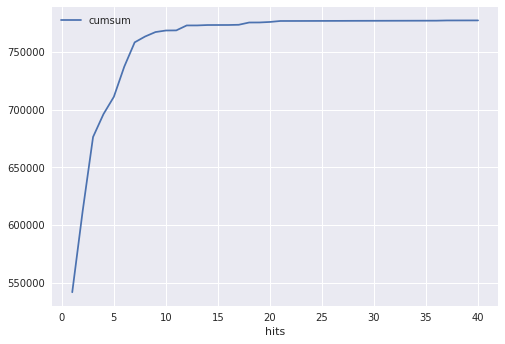

In [43]:
pd_sorted.plot(x='hits', y='cumsum')

In [44]:
df_ps_final = df_ps_final.drop("traceTimeentry")

In [45]:
categoricalFeatures = ['account', 'clientState', 'dataset', 'datasetScope', 'eventType', 'eventVersion', 'filename', 
                       'hostname', 'protocol', 'remoteSite', 'scope', 'traceId', 'traceIp', 'uuid', 'project', 
                       'run_number', 'stream_name', 'prod_step', 'datatype', 'dataset_version', 'hour', 'join_key_1']

encoded = df_ps_final

for elem in categoricalFeatures:
    encoded = encoded.withColumn(elem + "Hash", hash(encoded[elem]))

In [46]:
encoded.describe().toPandas()

summary  account         clientState  \
0  count   777286   777286               
1  mean    None     None                 
2  stddev  None     None                 
3  min     aagaard  CannotAuthenticate   
4  max     zzheng   SourceNotFound       

                                                                                               dataset  \
0  777286                                                                                                
1  None                                                                                                  
2  None                                                                                                  
3  data10_hi.00169927.physics_bulk.ROOT.NTUP_HI.r2111_p456                                               
4  mc16_valid.423105.Pythia8EvtGen_A14NNPDF23LO_gammajet_DP280_500.merge.AOD.e5094_s3238_r10441_r10210   

  datasetScope eventType eventVersion                            filename  \
0  777286       777286    777286       777286                               
1  None         None      None         None                                 
2  None         None      None         None                                 
3  data10_hi    download  1.13.2       AOD.05371635._000001.pool.root.1     
4  mc16_valid   download  1.15.5       log.13787275._000072.job.log.tgz.1   

                   hostname protocol             remoteSite       scope  \
0  777286                    777286   777286                 777286       
1  None                      None     None                   None         
2  None                      None     None                   None         
3  ReCaS-ui-01.cs.infn.it    davs     AGLT2_CALIBDISK        data10_hi    
4  xenia.nevis.columbia.edu  srm      ZA-WITS-CORE_PRODDISK  mc16_valid   

                            traceId                    traceIp  \
0  777286                            777286                      
1  None                              None                        
2  None                              None                        
3  00001963ee5a49178eccc3cd255fcb72  2001:1458:201:e4::100:28c   
4  fffff6db150d4a178afa9a39131df4fd  ::ffff:95.103.58.33         

     traceTimeentryUnix         transferStart  \
0  777286                777286                 
1  1.5236944545257292E9  1.5236943924140377E9   
2  652927.2270174625     652914.6027117195      
3  1.522533840149492E9   1.522527378084161E9    
4  1.525125586283086E9   1.525125342411194E9    

                               uuid           hour     project  \
0  777286                            777286         777286       
1  None                              None           None         
2  None                              None           None         
3  0003eeaf1bfb4181af7c6e5939938d37  2018-04-01 00  data10_hi    
4  ffff4fc350e24a83b6c082837d70776e  2018-04-30 23  mc16_valid   

          run_number                                   stream_name prod_step  \
0  777286             777286                                        777286     
1  349501.9749693951  None                                          None       
2  57523.63419065158  None                                          None       
3  00169927           AcerMCPythia_P2011CCTEQ6L1_singletop_tchan_l  PhysCont   
4  periodM            physics_bulk                                  simul      

  datatype dataset_version                                       join_key_1  \
0  777286   777286          777286                                            
1  None     None            None                                              
2  None     None            None                                              
3  AOD      c1130_m1847     AOD.05371635._000001.pool.root.12018-04-02 11     
4  log      x557_m1947      log.13787275._000072.job.log.tgz.12018-04-23 17   

                 hits      filesize_double          accountHash  \
0  777286              777286               777286                
1  2.01065502273294

In [48]:
encoded.write.format("json").save("/user/sprenner/training_official_april_hourly.json")